In [24]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical computations and handling arrays
import numpy as np

# Importing seaborn for data visualization and plotting statistical graphics
import seaborn as sns

# Importing matplotlib for creating visual plots and graphs
import matplotlib.pyplot as plt

# Importing train_test_split to divide the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Importing LinearRegression model for predicting continuous values using a linear approach
from sklearn.linear_model import LinearRegression

# Importing RandomForestRegressor model for more complex and non-linear predictions
from sklearn.ensemble import RandomForestRegressor

# Importing evaluation metrics to measure model performance (RMSE, R² score)
from sklearn.metrics import mean_squared_error, r2_score

# Reading the Uber dataset from a CSV file into a pandas DataFrame
df = pd.read_csv("uber.csv")

# Displaying the first 5 rows of the dataset to understand its structure and contents
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [25]:
# Display basic information about the dataset such as column names, data types, and non-null counts
print(df.info())

# Print a separator line for better readability in output
print("-----------------------")

# Display the total number of missing (NaN) values in each column of the dataset
print(df.isnull().sum())

# Remove all rows that contain any missing (NaN) values from the dataset
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
-----------------------
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [26]:
# Calculate distance using simple Euclidean formula
df["distance"] = (
    ((df['dropoff_latitude'] - df['pickup_latitude'])**2 +
     (df['dropoff_longitude'] - df['pickup_longitude'])**2) * 0.5
)

# Filter for reasonable fare, passenger count, and distance
#df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
#df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
#df = df[df['distance'] < 5]

In [27]:
# Extract time features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

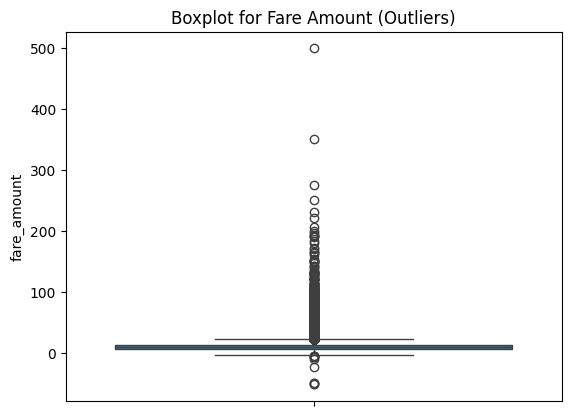

In [28]:
# Boxplot for fare amount
sns.boxplot(y=df['fare_amount'])
plt.title("Boxplot for Fare Amount (Outliers)")
plt.show()

Data shape after removing outliers: (182833, 12)


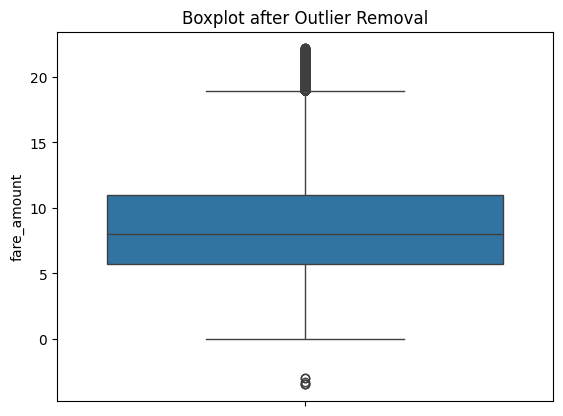

In [36]:
# Define upper and lower limits for 'fare_amount' using Interquartile Range (IQR)
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Keep only data points within the acceptable range (1.5 * IQR rule)
df = df[(df['fare_amount'] >= Q1 - 1.5 * IQR) & (df['fare_amount'] <= Q3 + 1.5 * IQR)]

# Print the new shape of the DataFrame after removing outliers
print("Data shape after removing outliers:", df.shape)

# Optional: Replot the boxplot after cleaning to confirm outlier removal
sns.boxplot(y=df['fare_amount'])
plt.title("Boxplot after Outlier Removal")
plt.show()

In [37]:
#Check the missing values now
df.isnull().sum()


,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
distance,0


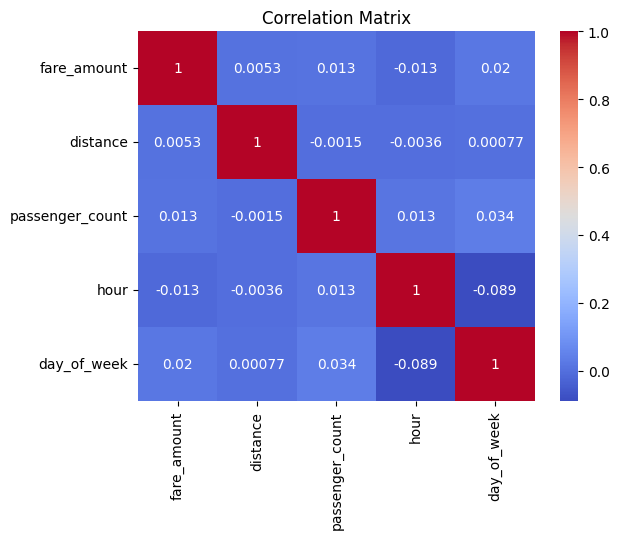

In [38]:
# Correlation heatmap
corr = df[['fare_amount', 'distance', 'passenger_count', 'hour', 'day_of_week']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [39]:
# Feature and target selection
X = df[['distance', 'passenger_count', 'hour', 'day_of_week']]
y = df['fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [40]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [41]:
# Evaluation function
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}\n")

In [42]:
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression Results:
  R² Score: 0.0001
  RMSE: 4.1366

Random Forest Regression Results:
  R² Score: 0.6426
  RMSE: 2.4729

